# Lab Notebook 1: Classical Inference vs Machine Learning

In this first notebook, we review some basic concepts of linear regression in order to contrast it with a machine learning approach.

## Step 1
Load the needed modules. Namely: numpy, matplotlib, and matplotlib.pyplot. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

At this time or later, you may also decide the parameters you would like for your figures using matplotlib.rc. 

## Step 2 
Now you can generate the data. Instead of a straight line, we will be generating data that is best suited to a polynomial fit.

Fix the random seed to 11 so that the data is reproducible (you will get the same randomly selected values every time you run this program). Then, generate an array of x values starting at -10 and ending at 10, with a spacing of 2. Generate an array of y values using y(x)=2x^2-3x-1. Make sure that a random sample of the Gaussian distribution with mean zero and standard deviation 10 is added to these y values.

Print the x-array and y-array.

In [2]:
## check back.
np.random.seed(11)
x_array = np.arange(-10,11,2)
y_array = 2*x_array**2 - 3*x_array - 1
random = np.random.normal(loc=0.0, scale=10.0, size=len(x_array))
y_array = y_array + random
print('x-array:', x_array)
print('y-array:', y_array)

x-array: [-10  -8  -6  -4  -2   0   2   4   6   8  10]
y-array: [246.49454741 148.13927003  84.15434868  16.46681441  12.91715371
  -4.19631364  -4.36629362  22.15402668  57.21050716  92.3439702
 160.1376033 ]


## Step 3

Plot the generated data in a scatter plot. Define the figure size, add a title, and label the axes. Add a dashed, slightly transparent horizontal line at y=0 for all values of x. Add a vertical line in the same style at x=0. Make sure that the scatter plot data is *on top* of the dashed lines. Show the figure.

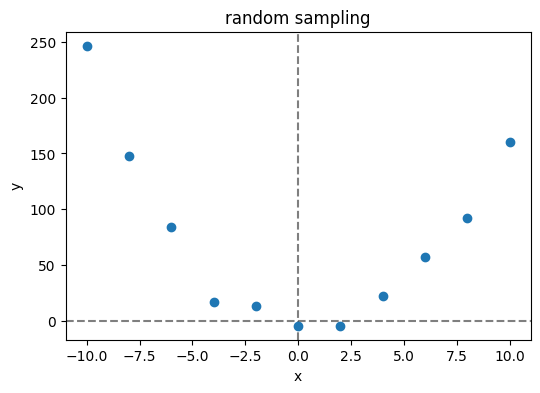

In [3]:
plt.figure(figsize = (6,4))
plt.scatter(x_array, y_array, zorder = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 1)
plt.axhline(y = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 2)
plt.title("random sampling")
plt.show()

## Step 4

Now, we want to fit this data. We will do this using a grid search that minimizes error. 

First, define the model that you think best fits this data. Do this by creating a function that intakes some  coefficients (ex: a,b,c) and the x-array, and outputs a y-array.

In [4]:
def model(a,b,c,x):
    return a*x**2 + b*x + c

Now define another function that is the sum of squared errors for a given guess fit. 

This function intakes the x-array, the model parameters, and the observed values of y (the y-values we generated initially!). It returns the sum of the difference between the observed values of y and the guess fit for a particular set of guess parameters.

In [5]:
def se(a,b,c,x,y):
    return np.sum((model(a,b,c,x) - y)**2)

## Step 5

Let's say our fitting model looks like this: y(x) = a*x^2 + b*x + c. We need to decide possible values of a, b, and c. Assuming we don't know how the data is generated, what could these values be?

To start, let's find a guess for the parameter c. To do this, find the minimum y-value and generate an array of guesses around that value. Let's make the array have 41 elements for now.

In [6]:
c_guess = min(y_array)
c_guess = np.linspace(c_guess - 5, c_guess + 5, 41)

In a similar manner, we need to determine our guess arrays for parameters a and b. We know that a is *positive* due to the concavity of our data. Since the minimum of our data falls slightly to the right of the origin, we can deduce that b is *negative*.

With this information, and the hint that |a_guess| and |b_guess| are less than 10, you can define the a_guess and b_guess arrays. Again, make sure the array has 41 elements.

In [7]:
a_guess = np.linspace(0.1,  10, 41)
b_guess = np.linspace(0, -10, 41)

## Step 6

Now to start making guesses for the best fit! Initialize a 3-dimensional array of zeros with dimension (41,41,41). This array will store the squared error for each guess of the best fit.

Next, find a way to fill the array with the squared errors. This will involve calling your squared error function and putting it in the appropriate place in the array using indices.

In [8]:
square_errs = np.array([[[se(a, b, c, x_array, y_array) for a in a_guess] for b in b_guess] for c in c_guess])

We can use this squared error array to see which combination of paramters a, b, and c gives the best polynomial fit. Below, find the minimum value in the squared error array, and find its indices. Use these indices to find the corresponding values of a, b, and c. 

In [9]:
indices = np.unravel_index(square_errs.argmin(), square_errs.shape)
best_a, best_b, best_c = [a_guess[indices[0]], b_guess[indices[1]], c_guess[indices[2]]]
square_errs[indices]
best_a, best_b, best_c

(1.8325, -3.25, -7.3662936223473)

## Step 7

We can now plot our best fit. Set up the generated data as before, and now plot the best fit as a line using your best guess for a, b, and c. Include a legend.

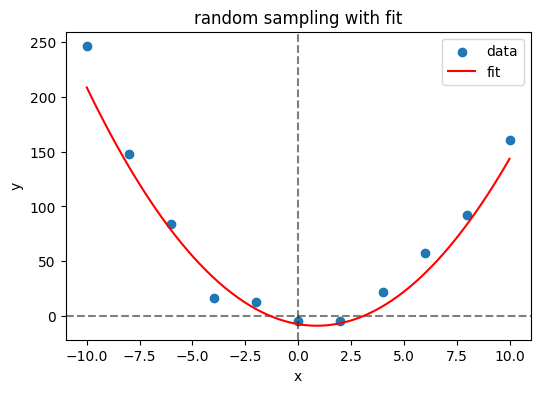

In [10]:
plt.figure(figsize = (6,4))
plt.scatter(x_array, y_array, label = 'data')
x = np.linspace(-10,10, 200)
plt.plot(x, model(best_a, best_b, best_c, x), 'r', label = 'fit', zorder = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 1)
plt.axhline(y = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 2)
plt.title("random sampling with fit")
plt.legend()
plt.show()

Now you can reflect on your fit. Is it good or poor? If you go back through your earlier steps, what can you change to improve the fit?

## Step 8

Now we're going to compare our self-coded grid search fitting method to a pre-established routine (numpy polyfit).

Use numpy polyfit for a second degree polynomial with inputs x and y. By setting full=True, find the residuals associated with the best-fit coefficients. Print the outputted coefficients.

In [11]:
coeff = np.polyfit(x_array, y_array, 2, full = True)
polyfit_a, polyfit_b, polyfit_c = coeff[0][0], coeff[0][1], coeff[0][2]

print("a:", polyfit_a)
print("b:", polyfit_b)
print("c:", polyfit_c)

a: 2.0787579240377245
b: -3.3713930328586796
c: -7.5634411143170235


Next: 

1) Compute and print the total sum of squares.

2) Compute and print the variance (the average of the sum of squares).

3) Compute and print the coefficient of determination R^2.

What is the R^2 value and what does it tell us?

R^2 tells us how well the data is predicted by the model

In [12]:
#1
sos = np.sum((np.mean(y_array) - y_array)**2)
print('sum of squares (TSS):', sos)

#2
print('variance:', sos/len(x_array))

#3
se_polyfit = se(polyfit_a, polyfit_b, polyfit_c, x_array,y_array)
r_squared = 1 - se_polyfit/sos
print('R^2:', r_squared)

sum of squares (TSS): 65349.61208273119
variance: 5940.873825702835
R^2: 0.9842916169006615


In the same figure style as Step 7, plot the generated data and the new fit.

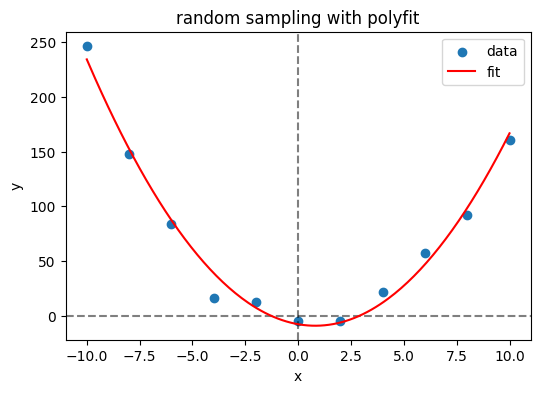

In [13]:
plt.figure(figsize = (6,4))
plt.scatter(x_array, y_array, label = 'data')
x = np.linspace(-10,10, 200)
plt.plot(x, model(polyfit_a, polyfit_b, polyfit_c, x), 'r', label = 'fit', zorder = 3)
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 1)
plt.axhline(y = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 2)
plt.title("random sampling with polyfit")
plt.legend()
plt.show()

How does the fit look now? Compare and discuss the results.

polyfit seems to have done a better job

## Step 9

In real life, data has some uncertainty associated with it. Next, we're going to see how to incorporate these uncertainties into the fitting procedure.

First, fix the random seed to 5. To construct the array of y-value uncertainties, dy, generate Gaussian random numbers again, this time with a standard deviaton of 10*sqrt(2). Make sure that there are the same number of uncertainties as there are y-values. 

In [14]:
np.random.seed(5)
dy = np.random.normal(loc=0.0, scale=10.0 * np.sqrt(2), size=len(x_array))
dy

array([  6.23989896,  -4.67921056,  34.3762958 ,  -3.56512109,
         1.55011725,  22.37966258, -12.85848798,  -8.36700586,
         2.65311026,  -4.66506568, -16.86823892])

For the fitting, we want to give more importance to the data points with *low* uncertainty. We can do this by using the chi-squared error.

Define a new function for calculating the chi-squared error. This function takes as input x, a, b, c, the observed y data, and the uncertainties. The output of this function is the same as the squared error in Step 4, with one difference; within the summation, all values are divided by the square of the uncertainties.

In [15]:
def chi_square(a,b,c,x,y,dy):
    return np.sum((model(a,b,c,x) - y)**2 / (dy**2))

## Step 10

Now, repeat Step 6 using the chi-squared error.

In [16]:
square_errs = np.array([[[chi_square(a, b, c, x_array, y_array, dy) for c in c_guess] for b in b_guess] for a in a_guess])

indices = np.unravel_index(square_errs.argmin(), square_errs.shape)

chi_a, chi_b, chi_c = [a_guess[indices[0]], b_guess[indices[1]], c_guess[indices[2]]]

square_errs[indices]

chi_a, chi_b, chi_c

(2.08, -2.75, -4.8662936223473)

Repeat Step 7 using the chi-squared error results. Include the error bars in the plot.

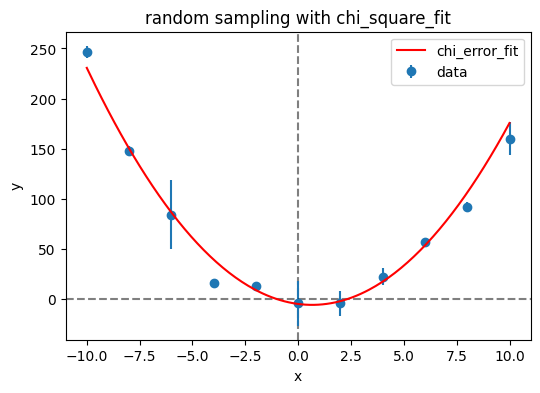

In [17]:
plt.figure(figsize = (6,4))
x = np.linspace(-10,10, 200)
plt.plot(x, model(chi_a, chi_b, chi_c, x), 'r', label = 'chi_error_fit', zorder = 3)
plt.errorbar(x_array, y_array, yerr=np.abs(dy), label='data', fmt="o")
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 1)
plt.axhline(y = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 2)
plt.title("random sampling with chi_square_fit")
plt.legend()
plt.show()

## Step 11

Now, let's plot all three of our fits in one figure: 
(1) grid search with squared error 
(2) numpy polyfit
(3) grid search with chi-squared error

You may have to adjust the labels and line characteristics to clearly see the fit differences.

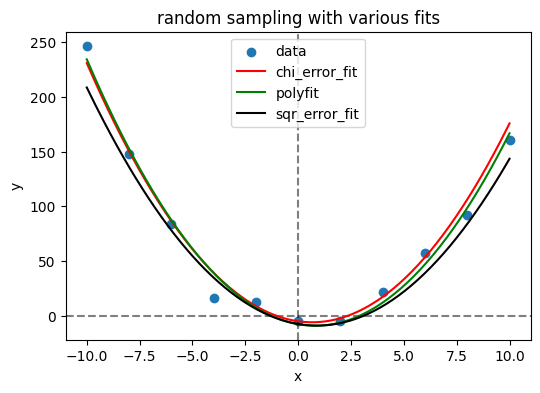

In [18]:
plt.figure(figsize = (6,4))
plt.scatter(x_array, y_array, label = 'data')
x = np.linspace(-10,10, 200)
plt.plot(x, model(chi_a, chi_b, chi_c, x), 'r', label = 'chi_error_fit', zorder = 3)
plt.plot(x, model(polyfit_a, polyfit_b, polyfit_c, x), 'g', label = 'polyfit', zorder = 4)
plt.plot(x, model(best_a, best_b, best_c, x), 'k', label = 'sqr_error_fit', zorder = 5)
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 1)
plt.axhline(y = 0, color = 'k', alpha = 0.5, linestyle = '--', zorder = 2)
plt.title("random sampling with various fits")
plt.legend()
plt.show()
